In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json

In [192]:
data_path_0 = "data_0.csv"
data_0 = pd.read_csv(data_path_0)
data_path_1 = "data_1.csv"
data_1 = pd.read_csv(data_path_1)
data = pd.concat([data_0, data_1], ignore_index=True)

In [193]:
data_dict = {
    'rating': [],
    'scenario_id': [],
    'structure': [],
    'type': [],
    'strength': [],
    'subject_id': [],
    'target': [],
    'background': [],
}

for i, row in data.iterrows():


    for trial_data in row[2:-1]:
        trial_data = eval(trial_data)

        data_dict['subject_id'].append(i)
   
        data_dict['rating'].append(trial_data['likertResponses']['likert1'])
        print(trial_data['scenario_id'])
        data_dict['scenario_id'].append(trial_data['scenario_id'])
        data_dict['structure'].append(trial_data['structure'])
        data_dict['type'].append(trial_data['type'])
        data_dict['strength'].append(trial_data['strength'])
        data_dict['target'].append(trial_data['target'])
        data_dict['background'].append(trial_data['background'])


0
1
3
4
3
3
0
2
3
1
1
4
2
0
3
1
1
4
1
2
4
0
3
2
2
4
3
0
2
4
2
1
1
0
4
3
2
0
4
0
3
3
0
2
1
3
1
1
4
3
2
0
4
2
0
3
2
0
3
1
4
1
2
1
3
4
0
4
4
0
4
0
2
4
3
0
1
2
2
1
0
0
2
1
1
3
1
1
2
3
4
0
1
4
2
0
4
4
3
1
4
2
3
2
1
4
3
2
4
0
3
2
1
3
2
0
3
0
4
0
2
1
4
4
1
4
3
4
0
4
0
3
2
1
4
4
2
3
2
3
0
0
0
1
1
0
3
3
2
0
2
3
1
2
3
4
0
1
2
1
0
0
1
2
2
0
1
1
3
3
3
3
4
2
0
1
1
1
0
1
4
4
0
2
3
2
0
4
2
3
4
3
3
2
1
4
2
0
4
4
0
3
0
3
3
1
4
2
4
2
0
1
4
1
2
2
2
1
3
2
4
1
2
0
1
0
1
2
3
4
4
4
0
3
0
3
3
0
4
1
1
4
2
4
4
4
0
4
0
4
2
0
0
1
0
2
3
3
1
4
0
3
2
2
1
0
2
1
2
4
2
3
0
3
3
3
3
1
1
1
4
3
4
3
1
3
2
4
0
0
0
1
2
1
3
2
2
0
0
2
1
4
3
1
3
1
4
3
2
0
4
2
1
3
4
2
0
4
1
0
0
2
1
0
0
4
4
2
3
3
0
4
3
1
4
2
0
2
2
4
2
1
1
3
3
1
0
3
4
1
0
2
1
4
3
1
0
3
2
4
1
0
0
0
4
2
2
4
3
1
3
4
2
4
3
3
1
0
0
2
0
0
2
1
3
4
0
1
4
4
3
2
3
2
4
2
3
1
1
1
3
2
2
2
0
4
3
3
1
1
4
2
0
3
4
2
1
4
1
3
3
1
1
3
4
0
0
3
4
1
4
1
0
2
0
2
4
0
0
2
4
1
4
0
2
1
1
1
4
0
3
3
4
2
3
0
1
2
4
1
2
1
3
0
0
3
4
2
0
1
2
3
2
4
0
0
3
4
3
2
4
1
2
1
2
4
0
3
4
1
3
2
3
2
2
3
4
4
3
4


In [194]:

df = pd.DataFrame(data_dict)
# print(df)

# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# aggregate across scenarios
grouped = df.groupby(['type', 'strength', 'subject_id'])
aggregated = grouped['rating'].agg(['mean', 'std', 'count'])
aggregated = aggregated.drop(['std', 'count'], axis=1).reset_index()
grouped = aggregated.groupby(['type', 'strength'])
# aggregate across subjects
aggregated = grouped['mean'].agg(['mean', 'std', 'count'])
aggregated['sem'] = 1.95 * aggregated['std'] / np.sqrt(aggregated['count'])
aggregated = aggregated.drop(['std', 'count'], axis=1).reset_index()
# aggregated
aggregated

,type,strength,mean,sem
0,good,mild,5.6600,0.204851
1,good,severe,6.3125,0.204182
2,harm,mild,3.7100,0.212215
3,harm,severe,2.2825,0.213827


Text(0, 0.5, 'Mean rating')

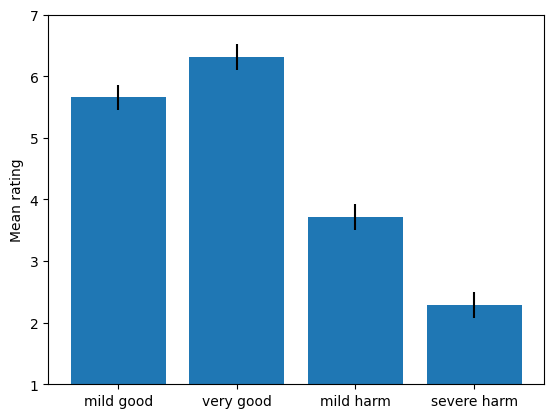

In [198]:
plt.bar(["mild good", "very good", "mild harm", "severe harm"], aggregated['mean'], yerr=aggregated['sem'])
plt.ylim(1, 7)
plt.ylabel("Mean rating")